In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

In [3]:
data ="""اسلام آباد: حکومت نے رواں ماہ اصولی طور پر 'کامیاب پاکستان پروگرام' متعارف کروانے کا فیصلہ کرلیا جس کے تحت 40 لاکھ گھرانوں کو متعدد اسکیمز کے تحت معاونت فراہم کی جائے گی۔

ڈان اخبار کی رپورٹ کے مطابق یہ پروگرام آئندہ انتخابات سے قبل حکومت کی جانب سے معاشرے کے غریب طبقے کے لیے اٹھائے گئے بڑے اقدامات میں سے ایک معلوم ہوتا ہے۔

ڈان سے گفتگو کرتے ہوئے وزیر خزانہ شوکت ترین نے کہا کہ 'ہم نے اس پروگرام کے ہر پہلو کو حتمی شکل دے دی ہے اور اسے جولائی کے وسط میں متعارف کروایا جائے گا'۔

یہ بھی پڑھیں: بجٹ 2022ء میں نوجوانوں کے لیے کیا ’خاص‘ ہے؟

پروگرام کے چند پہلوؤں سے آگاہ کرتے ہوئے انہوں نے بتایا کہ اس کا مقصد عوام کو رہائشی منصوبوں، ہنر کی تربیت، صحت کارڈ اور کاروبار اور زرعی کاموں کے لیے بلاسود قرضے فراہم کرنا ہے۔

تاہم ان کا کہنا تھا کہ اہداف ایک سال میں نہیں بلکہ وقت کے ساتھ ساتھ حاصل کیے جائیں گے۔

وفاقی وزیر نے کہا کہ مالی سال 22-2021 کے دوران تقریباً 3 کھرب سے 4 کھرب روپے کے بلاسود قرضے دیے جائیں گے اور کہا کہ بلاسود قرضوں کے لیے سبسڈی کی رقم مالی سال 22-2021 کے بجٹ میں مختص کی جاچکی ہے۔

انہوں نے بتایا کہ 'کامیاب جوان پروگرام' اس منصوبے کا ہی حصہ ہوگا۔

ٹیکس بیس کو بڑھانے کے بارے میں انہوں نے کہا کہ 72 لاکھ افراد کو ٹیکس نیٹ میں لانے کے لیے حکمت عملی تشکیل دی گئی ہے جسے جلد حتمی شکل دی جائے گی اور کسی ٹیکس دہندہ کو ہراساں نہیں کیا جائے گا۔

مزید پڑھیں: نوجوانوں کو روزگار کی فراہمی کیلئے 2 خصوصی پروگرامز شروع کیے ہیں، وزیراعظم

ان کا مزید کہنا تھا کہ رواں مالی سال میں پوائنٹ آف سیل پروگرام کو زیادہ سے زیادہ تاجروں تک پہنچایا جائے گا۔

دوسری جانب اقتصادری مشاورتی کونسل (ای اے سی) کے اجلاس میں وزیر خزانہ نے مستحکم اور مجموعی اقتصادی نمو کے حصول کے لیے طویل المدتی منصوبہ بندی پر زور دیا۔

انہوں نے کہا کہ وزیراعظم عمران خان نے دہائیوں کے بعد ای اے سی کی تشکیل نو کی ہے، جس کا مقصد تمام اسٹیک ہولڈرز سے مشاورت کر کے پائیدار معاشی نمو کے لیے ٹھوس تجاویز مرتب کرنا ہے۔

ای اے سی کے تیسرے اجلاس کے دوران 4 ذیلی گروپوں نے سرکاری انٹرپرائزز اور نجکاری، توانائی، مقامی تجارت اور ملک میں قیمتیں مستحکم رکھنے پر پریزینٹیشنز دیں۔

وزیراعظم کے معاون خصوصی برائے خزانہ و ریونیو ڈاکٹر وقار مسعود خان نے قیمتوں میں استحکام سے متعلق ایک تفصیلی جائزہ پیش کیا جس میں ملک میں قیمتیں مستحکم کرنے کے لیے قلیل مدتی، وسط مدتی اور طویل مدتی تجاویز شامل تھیں۔

یہ بھی پڑھیں: حکومت نے 'کامیاب جوان پروگرام' میں قرضوں کی حد ڈھائی کروڑ روپے تک بڑھا دی

انہوں نے موجودہ اور تاریخی تناظر میں پاکستان اور پورے خطے میں قیمتوں کے مابین تقابلی جائزہ پیش کیا۔ شامل کیا گیا۔

علاوہ ازیں زید بشیر نے 'ڈومیسٹک کامرس سیکٹر' کے بارے میں پریزنٹیشن دیتے ہوئے دستاویزی/ مربوط شعبوں کو تقویت دینے اور ان کی بحالی اور مختصر مدت کے دوران خوردہ فروشوں کو مزید منظم ماحول میں لاکر قومی خزانے میں شراکت میں اضافہ کرنے کے ذریعہ ای کامرس کی حقیقی صلاحیت کا پوری طرح سے ادراک کرنے کی نشاندہی کی۔

کمپنیوں کے اندراج پر ٹیکس کریڈٹ اور درمیانی مدت کے منصوبوں کے تحت خواتین کو ملازمت میں شامل کرنے کی حوصلہ افزائی جبکہ تجارتی شعبے کو فروغ دینے کے لئے طویل المدتی حکمت عملی کے تحت خوردہ فروشوں کی ترقی اور ٹیکس ایڈجسٹیبیلیٹی کے لیے تجاویز دی گئیں۔
"""


In [4]:
data

"اسلام آباد: حکومت نے رواں ماہ اصولی طور پر 'کامیاب پاکستان پروگرام' متعارف کروانے کا فیصلہ کرلیا جس کے تحت 40 لاکھ گھرانوں کو متعدد اسکیمز کے تحت معاونت فراہم کی جائے گی۔\n\nڈان اخبار کی رپورٹ کے مطابق یہ پروگرام آئندہ انتخابات سے قبل حکومت کی جانب سے معاشرے کے غریب طبقے کے لیے اٹھائے گئے بڑے اقدامات میں سے ایک معلوم ہوتا ہے۔\n\nڈان سے گفتگو کرتے ہوئے وزیر خزانہ شوکت ترین نے کہا کہ 'ہم نے اس پروگرام کے ہر پہلو کو حتمی شکل دے دی ہے اور اسے جولائی کے وسط میں متعارف کروایا جائے گا'۔\n\nیہ بھی پڑھیں: بجٹ 2022ء میں نوجوانوں کے لیے کیا ’خاص‘ ہے؟\n\nپروگرام کے چند پہلوؤں سے آگاہ کرتے ہوئے انہوں نے بتایا کہ اس کا مقصد عوام کو رہائشی منصوبوں، ہنر کی تربیت، صحت کارڈ اور کاروبار اور زرعی کاموں کے لیے بلاسود قرضے فراہم کرنا ہے۔\n\nتاہم ان کا کہنا تھا کہ اہداف ایک سال میں نہیں بلکہ وقت کے ساتھ ساتھ حاصل کیے جائیں گے۔\n\nوفاقی وزیر نے کہا کہ مالی سال 22-2021 کے دوران تقریباً 3 کھرب سے 4 کھرب روپے کے بلاسود قرضے دیے جائیں گے اور کہا کہ بلاسود قرضوں کے لیے سبسڈی کی رقم مالی سال 22-2021 کے بجٹ میں مخت

In [9]:
# All data in one string:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."


'In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Ne

In [5]:
tokenizer= Tokenizer()

In [15]:
corpus =data.lower().split("\n")

In [18]:
# corpus

In [19]:
tokenizer.fit_on_texts(corpus)

In [21]:
word_index = tokenizer.word_index

In [23]:
total_words = len(word_index)+1

In [20]:
# word_index

In [ ]:
corpus = data.lower()

In [17]:
tokenizer = Tokenizer()

# Split into sentences:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # Add 1 for OOV.

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [24]:
# for line in corpus:
#     token_list = tokenizer.texts_to_sequences([line])
#     print(token_list)
# #     print(line)

In [24]:
input_sequences=[]
for line in corpus:
    print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1,len(token_list)):
        ngram_sequence = token_list[:i+1]
        print(ngram_sequence)
        input_sequences.append(ngram_sequence)
#         print(token_list[:i+1])

اسلام آباد: حکومت نے رواں ماہ اصولی طور پر 'کامیاب پاکستان پروگرام' متعارف کروانے کا فیصلہ کرلیا جس کے تحت 40 لاکھ گھرانوں کو متعدد اسکیمز کے تحت معاونت فراہم کی جائے گی۔
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109, 27, 1, 17, 110, 50, 111, 6, 112, 113, 1, 17, 114, 51, 4, 11, 115]
[102, 103]
[102, 103, 24]
[102, 103, 24, 3]
[102, 103, 24, 3, 47]
[102, 103, 24, 3, 47, 104]
[102, 103, 24, 3, 47, 104, 105]
[102, 103, 24, 3, 47, 104, 105, 106]
[102, 103, 24, 3, 47, 104, 105, 106, 16]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109]
[102,

In [48]:
input_sequences = []
for line in corpus: # Go through every line in corpus
    token_list = tokenizer.texts_to_sequences([line])[0] # See explanation above
    for i in range(1, len(token_list)):
        print(token_list[:i+1])
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

[102, 103]
[102, 103, 24]
[102, 103, 24, 3]
[102, 103, 24, 3, 47]
[102, 103, 24, 3, 47, 104]
[102, 103, 24, 3, 47, 104, 105]
[102, 103, 24, 3, 47, 104, 105, 106]
[102, 103, 24, 3, 47, 104, 105, 106, 16]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109, 27]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109, 27, 1]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109, 27, 1, 17]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 10

In [27]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [28]:
input_sequences[:,:-1]

array([[  0,   0,   0, ...,   0,   0, 102],
       [  0,   0,   0, ...,   0, 102, 103],
       [  0,   0,   0, ..., 102, 103,  24],
       ...,
       [  0,   0,   0, ..., 309,   1,   8],
       [  0,   0,   0, ...,   1,   8,  45],
       [  0,   0,   0, ...,   8,  45,  13]], dtype=int32)

In [29]:
input_sequences[:,-1]

array([103,  24,   3,  47, 104, 105, 106,  16,  25,  48,  26,  49, 107,
        10, 108, 109,  27,   1,  17, 110,  50, 111,   6, 112, 113,   1,
        17, 114,  51,   4,  11, 115, 116,   4, 117,   1, 118,  28,  18,
       119, 120,   7, 121,  24,   4,  53,   7, 122,   1, 123, 124,   1,
         8, 125, 126, 127, 128,   2,   7,  29, 129, 130,  19,   7, 131,
        54,  30,  31,  32, 132, 133,   3,  12,   9, 134,   3,  33,  18,
         1, 135, 136,   6,  55,  56, 137,  13,  57,   5, 138, 139,   1,
        58,   2,  49, 140,  11, 141,  59,  34,  60, 142,   2,  61,   1,
         8,  20, 143, 144,   1, 145, 146,   7, 147,  54,  30,  14,   3,
        62,   9,  33,  10,  63, 148,   6, 149, 150, 151,   4, 152, 153,
       154,   5, 155,   5, 156, 157,   1,   8,  35,  64,  51,  65,  19,
        36,  10,  66,  67,   9, 159,  29,  21,   2,  68, 160, 161,   1,
        69,  69, 162,  70,  71, 163,  31,   3,  12,   9,  37,  21,  72,
        73,   1,  38, 165, 166,  74,   7,  75,  74,  76,   1,  3

In [57]:
labels

array([  2,  66,   8,  67,  68,  69,  70,  40,  20,  21,  72,   3,  73,
        74,  75,   1,  76,  33,   3,  77,  22,  33,   3,  78,   1,  79,
        80,   8,  81,  82,   3,  83,  84,   7,  42,   1,  43,  86,  87,
        33,  44,  88,  13,   2,  45,  89,  90,  91,  92,  93,  94,  95,
        96,  97,   2,  98,   1,   2,  99,   8,   9,  10,  13, 100, 101,
        23, 102, 103,   5,   2,  47,  17,   1,  24,   6, 104, 105,  48,
         4,   3, 106, 107,  42,   1,  43,  49,  25,  50,  18, 108,  25,
         3, 109, 111,  26,  47, 112, 113,  51,  52,   3, 114,   7,  13,
       115,  27,   3, 116,   6,  53, 117, 118, 119, 120,   4,  54,   7,
         9,  10,  11, 121,   8, 122,   1, 123,   7,   2, 124,   1, 126,
        28,  34, 127,   1, 128,  11,   2, 129, 130, 131,   2,  17,   1,
        49,  40,  19, 134,  25,  18, 135,  18, 136, 137,  26, 138, 139,
         4, 140,  55, 141, 143, 144,   1,   2, 145, 146, 147, 148, 149,
        12,   9,  10,  11, 150,   5, 151,   8, 152, 153,  25,   

In [30]:
total_words

311

**Pro tip:** If you pass line instead of [line], you get a sequence character by character instead of word by word. tokenizer.texts_to_sequences([line]) gives [[34, 417, 877, 166, 213, 517]]. Since this is nested, we use tokenizer.texts_to_sequences([line])[0].



**Note:** We use pre-padding so that the last element in the sequence after padding is the label for the n-gram. See 'n-grams.png' in the course folder.

In [31]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # One hot encoding

In [32]:
tf.keras.utils.to_categorical(labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [33]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) 

In [34]:
# tokenizer.word_index["of"]

In [0]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [35]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 102 103
  24   3  47 104 105]


In [70]:
xs[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4], dtype=int32)

In [71]:
xs

array([[  0,   0,   0, ...,   0,   0,   4],
       [  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       ...,
       [  0,   0,   0, ...,  61,  60, 262],
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9]], dtype=int32)

**Note:** ys will be of length num_words. The corresponding word in ys (next word in the sentence) will be set to 1 in the one hot vector.

In [36]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


NameError: name 'tokenizer' is not defined

**Pro tip:** The (max_sequence_len - 1) comes from the fact if we have a training set "I go to the park to play" and we want to predict "play," that word, "play" cannot be in the training set, so all of the training sentences need to be reduced by 1 to account for us predicting the next word.

**Note:** We are using a 64 dimensional embedding for each word in the sentences.

**Note:** We are using a lot of epochs because we don't have a lot of data. We can see that accuracy improves over time.

In [38]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
18/18 [==============================] - 3s 25ms/step - loss: 5.7349 - accuracy: 0.0478
Epoch 2/500
18/18 [==============================] - 0s 25ms/step - loss: 5.6903 - accuracy: 0.0654
Epoch 3/500
18/18 [==============================] - 0s 26ms/step - loss: 5.5538 - accuracy: 0.0684
Epoch 4/500
18/18 [==============================] - 0s 24ms/step - loss: 5.3649 - accuracy: 0.0699
Epoch 5/500
18/18 [==============================] - 0s 23ms/step - loss: 5.2599 - accuracy: 0.0729
Epoch 6/500
18/18 [==============================] - 0s 25ms/step - loss: 5.2366 - accuracy: 0.0587
Epoch 7/500
18/18 [==============================] - 0s 25ms/step - loss: 5.2668 - accuracy: 0.0701
Epoch 8/500
18/18 [==============================] - 0s 24ms/step - loss: 5.2027 - accuracy: 0.0609
Epoch 9/500
18/18 [==============================] - 0s 23ms/step - loss: 5.1821 - accuracy: 0.0724
Epoch 10/500
18/18 [==============================] - 0s 23ms/step - loss: 5.1707 - accuracy: 0.0490

18/18 [==============================] - 1s 38ms/step - loss: 0.7474 - accuracy: 0.9423
Epoch 163/500
18/18 [==============================] - 1s 38ms/step - loss: 0.7441 - accuracy: 0.9344
Epoch 164/500
18/18 [==============================] - 1s 40ms/step - loss: 0.7374 - accuracy: 0.9360
Epoch 165/500
18/18 [==============================] - 1s 36ms/step - loss: 0.7597 - accuracy: 0.9429
Epoch 166/500
18/18 [==============================] - 1s 32ms/step - loss: 0.7336 - accuracy: 0.9402
Epoch 167/500
18/18 [==============================] - 1s 39ms/step - loss: 0.7012 - accuracy: 0.9397
Epoch 168/500
18/18 [==============================] - 1s 41ms/step - loss: 0.7029 - accuracy: 0.9470
Epoch 169/500
18/18 [==============================] - 1s 38ms/step - loss: 0.6961 - accuracy: 0.9489
Epoch 170/500
18/18 [==============================] - 1s 38ms/step - loss: 0.6619 - accuracy: 0.9503
Epoch 171/500
18/18 [==============================] - 1s 54ms/step - loss: 0.6647 - accuracy: 0

18/18 [==============================] - 1s 51ms/step - loss: 0.1320 - accuracy: 0.9871
Epoch 323/500
18/18 [==============================] - 1s 57ms/step - loss: 0.1639 - accuracy: 0.9812
Epoch 324/500
18/18 [==============================] - 1s 49ms/step - loss: 0.1407 - accuracy: 0.9880
Epoch 325/500
18/18 [==============================] - 1s 57ms/step - loss: 0.1425 - accuracy: 0.9871
Epoch 326/500
18/18 [==============================] - 1s 50ms/step - loss: 0.1241 - accuracy: 0.9890
Epoch 327/500
18/18 [==============================] - 1s 47ms/step - loss: 0.1225 - accuracy: 0.9925
Epoch 328/500
18/18 [==============================] - 1s 46ms/step - loss: 0.1349 - accuracy: 0.9808
Epoch 329/500
18/18 [==============================] - 1s 64ms/step - loss: 0.1223 - accuracy: 0.9924
Epoch 330/500
18/18 [==============================] - 1s 46ms/step - loss: 0.1289 - accuracy: 0.9874
Epoch 331/500
18/18 [==============================] - 1s 49ms/step - loss: 0.1290 - accuracy: 0

18/18 [==============================] - 1s 62ms/step - loss: 0.0442 - accuracy: 0.9915
Epoch 483/500
18/18 [==============================] - 1s 44ms/step - loss: 0.0504 - accuracy: 0.9895
Epoch 484/500
18/18 [==============================] - 1s 56ms/step - loss: 0.0421 - accuracy: 0.9963
Epoch 485/500
18/18 [==============================] - 1s 51ms/step - loss: 0.0473 - accuracy: 0.9911
Epoch 486/500
18/18 [==============================] - 1s 57ms/step - loss: 0.0428 - accuracy: 0.9889
Epoch 487/500
18/18 [==============================] - 1s 45ms/step - loss: 0.0448 - accuracy: 0.9900
Epoch 488/500
18/18 [==============================] - 1s 56ms/step - loss: 0.0434 - accuracy: 0.9901
Epoch 489/500
18/18 [==============================] - 1s 60ms/step - loss: 0.0379 - accuracy: 0.9946
Epoch 490/500
18/18 [==============================] - 1s 67ms/step - loss: 0.0484 - accuracy: 0.9845
Epoch 491/500
18/18 [==============================] - 1s 51ms/step - loss: 0.0499 - accuracy: 0

In [41]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

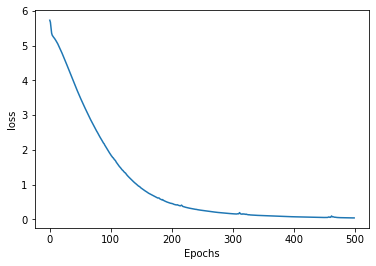

In [42]:
plot_graphs(history, 'loss')
# plot_graphs(history, 'val_loss')

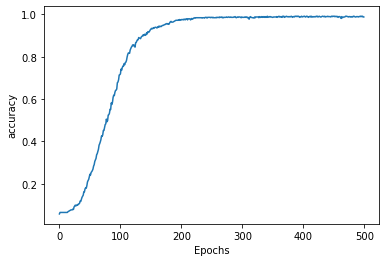

In [43]:
plot_graphs(history, 'accuracy')

**Note:** Each next word is based on the highest probability. Since our corpus is small, the quality of predictions goes down as the sequence lengthens. For example, we have repeated words sometimes. This is because the probability that each word matches an existing phrase goes down as the number of words you create increases.

In [44]:
seed_text = "Laurence went to dublin"
next_words = 100 # Ask to predict the next n words
  

In [45]:
seed_text ="شوکت ترین نے کہا کہ ہم نے اس پروگرام کے ہر پہلو کو"

In [46]:
tokenizer.texts_to_sequences([seed_text])

[[132, 133, 3, 12, 9, 3, 33, 18, 1, 135, 136, 6]]

In [47]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1)
    predicted = model.predict_classes(token_list,verbose=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/home/mazz/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1/1 [==============================] - 0s 22ms/step
شوکت ترین نے کہا کہ ہم نے اس پروگرام کے ہر پہلو کو حتمی شکل دے دی ہے اور اسے جولائی کے وسط میں متعارف کروایا جائے گا'۔ گا'۔ گا'۔ گا'۔ گا'۔ گا'۔ گا'۔ انہوں وسط طویل مدتی اور طویل المدتی حکمت عملی کی ٹیکس ایڈجسٹیبیلیٹی کے لیے تجاویز دی گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ کیا جس میں ملک میں قیمتیں کرنے کے ایڈجسٹیبیلیٹی کے لیے کیا کرنے کے گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ گئیں۔ شراکت میں اضافہ کرنے کے اضافہ نمو کے تحت نمو کے تحت معاونت کامرس کی کی حقیقی صلاحیت کا پوری طرح سے ادراک کرنے کی


In [103]:

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin that nice able able able all groups odaly weeks weeks weeks at me me long weeks me me her for weeks went her a as rose a jig jig jig jig accident happened young ball milliner accident happened terrance mccarthy academy mccarthy rose up up up up lanigan entangled a jig hall hall a call eyes rose water entangled mavrone me mavrone a eyes glisten lanigan lanigan lanigan lanigan mavrone steps steps til hall odaly mavrone up a call call odaly mavrone up up up long to weeks weeks weeks weeks weeks was entangled entangled entangled at academy runctions entangled entangled entangled merry long weeks weeks at were entangled entangled entangled all girls weeks weeks weeks weeks weeks weeks weeks at were entangled at runctions runctions entangled entangled entangled merry long weeks weeks at were entangled entangled entangled all girls weeks weeks weeks weeks weeks weeks weeks at were entangled at runctions runctions entangled entangled entangled merry long weeks weeks at 